## Analyse des clusters et établissement des profiles

Dans cette section, je vais analyser les caractéristiques de chaque cluster identifié par l'algorithme K-means afin de comprendre les comportements et les préférences distincts des différents segments de clientèle et de dresser le profil de chaque groupe afin d'identifier les traits clés qui définissent les clients de chaque groupe.

In [2]:
customer_df = pd.read_csv('customer_df_cluster_kmeans.csv')

In [ ]:
from tabulate import tabulate

# Assuming customer_df is your dataframe
# Regroupement par cluster et calcul des valeurs moyennes (centroïdes)
centroids = customer_df.groupby('cluster').mean().reset_index()

# Exclure la colonne "Cluster" de la mise à l'échelle
features = centroids.columns.difference(['cluster','user_id','number_events'])

# Appliquer StandardScaler aux centroïdes
scaler = StandardScaler()
centroids[features] = scaler.fit_transform(centroids[features])

# Convert centroids DataFrame to a list of lists for tabulate
centroids_list = centroids.values.tolist()

# Define headers
headers = centroids.columns.tolist()

# Create and print the table
print(tabulate(centroids_list, headers=headers, tablefmt='grid'))

+-----------+-------------+----------------------------+-----------------+--------------------+--------------------------+---------------+------------------------+------------------------------+-------------------------+--------------------------+--------------------+---------------+-------------------------+------------------------+------------------+
|   cluster |     user_id |   days_since_last_purchase |   number_events |   number_purchases |   number_unique_products |   total_spent |   average_amount_spent |   avg_days_between_purchases |   favorite_shopping_day |   favorite_shopping_hour |   remove_frequency |   remove_rate |   monthly_spending_mean |   monthly_spending_std |   spending_trend |
+===========+=============+============================+=================+====================+==========================+===============+========================+==============================+=========================+==========================+====================+===============+======

In [9]:
customer_df[(customer_df['cluster']==3) ]

,user_id,days_since_last_purchase,number_events,number_purchases,number_unique_products,total_spent,average_amount_spent,avg_days_between_purchases,favorite_shopping_day,favorite_shopping_hour,remove_frequency,remove_rate,monthly_spending_mean,monthly_spending_std,spending_trend,cluster
37,43695999,58,67,25,25,125.82,5.032800,6.000000,3,9,42,0.626866,62.910,29.514637,-41.740,3
44,47076222,4,98,38,34,109.26,2.875263,30.250000,4,18,60,0.612245,27.315,12.783053,2.828,3
51,50142794,26,35,14,14,43.68,3.120000,37.000000,0,9,21,0.600000,14.560,4.494430,-4.140,3
58,54710988,14,113,26,20,120.18,4.622308,31.666667,1,20,87,0.769912,40.060,15.725126,1.630,3
62,58556296,24,42,15,15,41.95,2.796667,23.500000,2,11,27,0.642857,20.975,17.090771,-24.170,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95963,608228354,25,94,31,31,196.10,6.325806,1.000000,4,8,63,0.670213,98.050,87.242835,-123.380,3
95971,608232807,9,19,8,8,68.10,8.512500,10.500000,3,15,11,0.578947,34.050,18.526198,-26.200,3
96165,608459001,11,66,26,21,52.12,2.004615,5.666667,4,6,40,0.606061,26.060,9.913637,-14.020,3
96262,608547794,23,40,9,9,75.99,8.443333,2.500000,3,6,31,0.775000,37.995,33.806775,47.810,3


In [3]:
# Regroupement par cluster et calcul des valeurs moyennes (centroïdes)
centroids = customer_df.groupby('cluster').mean().reset_index()

# Exclure la colonne "Cluster" de la mise à l'échelle
features = centroids.columns.difference(['cluster','user_id'])

# Appliquer StandardScaler aux centroïdes
scaler = StandardScaler()
centroids[features] = scaler.fit_transform(centroids[features])

# Définir le nombre de clusters
num_clusters = centroids['cluster'].nunique()

In [4]:
# Définir une palette de couleurs pour les clusters
palette = ['#FF8000', '#80FF00', '#B266FF', '#FF99FF','#ff66ff']

# Créer subplots
rows = (num_clusters // 2) + (num_clusters % 2)  # Arrange in 2 columns
fig = make_subplots(
    rows=rows, cols=2,
    subplot_titles=[f'Cluster {i}' for i in range(num_clusters)],
    specs=[[{'type': 'polar'}]*2]*rows,
    horizontal_spacing=0.1,  # Increase spacing between plots
    vertical_spacing=0.15
)

# ajouter les cartes radar aux subplots
for i, cluster_label in enumerate(range(num_clusters)):
    cluster_data = centroids.loc[centroids['cluster'] == cluster_label, features].values.flatten()

    row = (i // 2) + 1
    col = (i % 2) + 1

    fig.add_trace(go.Scatterpolar(
        r=cluster_data,
        theta=features,
        fill='toself',
        name=f'Cluster {cluster_label}',
        marker=dict(color=palette[i])
    ), row=row, col=col)

for annotation in fig['layout']['annotations']:
    annotation['yanchor'] = 'bottom'
    annotation['y'] += 0.03  # Adjust this value to control the space above each title

# mise à jour du layout
fig.update_layout(
    height=800,
    width=1200,
    title_text="Cartes radar des Centroïdes",
    showlegend=False
)

fig.show()

Profils de clients dérivés de l'analyse du diagramme radar:

**Cluster 0:**

- Le nombre d'événements auxquels ils ont participé est modéré, montrant une certaine participation aux activités de la plateforme.
- Le nombre d'achats est significativement inférieur à la moyenne, indiquant une faible activité d'achat. Pour la plupart dans ce cluster ils n'ont effectué qu'un seul achat.
- Le nombre de produits uniques achetés est également très inférieur à la moyenne, suggérant une faible diversité dans leurs achats.
- Le total des dépenses est légèrement au-dessus de la moyenne, malgré un nombre d'achats faible.
- Le montant moyen dépensé par achat est très élevé, indiquant que lorsqu'ils achètent, ils dépensent de grandes sommes.
- Ils montrent une légère préférence pour faire leurs achats en début de semaine, en dehors des heures de pointe, probablement en journée.
- La fréquence de retrait des articles du panier est très inférieure à la moyenne, montrant une grande détermination dans leurs choix d'achats.
- La dépense mensuelle moyenne est au-dessus de la moyenne, malgré un faible nombre d'achats.
- La tendance des dépenses est légèrement positive, indiquant une légère augmentation des dépenses au fil du temps.

**Cluster 1:** 

- Les clients de ce cluster ont participé à un nombre élevé d'événements (telles que visites de sites web ou interactions avec des campagnes), indiquant un fort engagement global.
- Le nombre d'achats est inférieur à la moyenne, ce qui suggère que malgré leur engagement élevé, ils n'effectuent pas souvent des achats.
- Les clients achètent moins de produits uniques comparé à la moyenne, ce qui peut indiquer une préférence pour certains produits spécifiques ou un manque de diversité dans leurs achats.
- Le total dépensé est significativement inférieur à la moyenne. Cela reflète des achats de faible valeur globale.
- Le montant moyen dépensé par achat est également inférieur à la moyenne, confirmant que leurs achats sont généralement de faible valeur.
avg_days_between_purchases: -0.46086
- La fréquence à laquelle les articles sont retirés du panier est inférieure à la moyenne, ce qui pourrait indiquer une prise de décision plus rapide ou moins d'hésitation lors de l'achat.
- La dépense mensuelle moyenne est bien en dessous de la moyenne, reflétant leur faible total dépensé.
monthly_spending_std: -0.514709
- La tendance des dépenses est légèrement positive, ce qui suggère une augmentation modeste mais constante de leurs dépenses au fil du temps.

**Cluster 2:**

- Ces clients participent à un très grand nombre d'événements, indiquant un niveau d'engagement exceptionnellement élevé.
- Le nombre d'achats est bien au-dessus de la moyenne, montrant que ces clients effectuent fréquemment des achats.
- Les clients de ce cluster achètent une grande variété de produits, indiquant une diversité élevée dans leurs choix d'achats.
- Le total des dépenses est supérieur à la moyenne, ce qui reflète une propension à dépenser plus globalement.
- Le montant moyen dépensé par achat est légèrement inférieur à la moyenne, malgré un total dépensé élevé, ce qui pourrait indiquer des achats fréquents de faible à moyenne valeur.
- Les jours moyens entre les achats sont inférieurs à la moyenne, indiquant une fréquence d'achat plus élevée.
- L'heure préférée pour faire des achats est légèrement supérieure à la moyenne, indiquant peut-être une tendance à faire des achats à des jours et des heures spécifiques.
- La fréquence à laquelle les articles sont retirés du panier est bien au-dessus de la moyenne, ce qui pourrait indiquer une plus grande hésitation ou comparaison avant de finaliser l'achat.
- La dépense mensuelle moyenne est bien au-dessus de la moyenne, reflétant des dépenses élevées de manière régulière.
- La tendance des dépenses est positive, indiquant une augmentation constante et significative de leurs dépenses au fil du temps.

**Cluster 3:**

- Les clients de ce cluster n'ont pas effectué d'achats depuis longtemps, ce qui indique une activité d'achat très basse ou inexistante récemment.
- Malgré leur inactivité récente en termes d'achats, ces clients participent à de nombreux événements, ce qui montre un engagement élevé.
- Le nombre d'achats est bien au-dessus de la moyenne, indiquant que lorsqu'ils achètent, ils achètent beaucoup.
- Les clients de ce cluster achètent une grande variété de produits, montrant une diversité élevée dans leurs choix d'achats.
- Le total des dépenses est bien supérieur à la moyenne, ce qui reflète une propension à dépenser de manière significative lorsqu'ils achètent.
- Le montant moyen dépensé par achat est légèrement inférieur à la moyenne, malgré un total dépensé élevé, ce qui pourrait indiquer des achats fréquents de faible à moyenne valeur lorsqu'ils sont actifs.
- Les jours moyens entre les achats sont bien supérieurs à la moyenne, ce qui montre que les achats sont espacés de longues périodes.
- Ces clients montrent une préférence pour faire leurs achats en début de semaine, contrairement à la moyenne et ont tendance à faire leurs achats très tôt le matin ou très tard le soir, ce qui est atypique par rapport aux autres clients.
- La fréquence à laquelle les articles sont retirés du panier est bien au-dessus de la moyenne, ce qui pourrait indiquer une grande hésitation ou comparaison avant de finaliser l'achat.
- La variation des dépenses mensuelles est extrêmement élevée, indiquant des comportements d'achat très irréguliers.
spending_trend: -1.95547
- La tendance des dépenses est fortement négative, suggérant une diminution continue et significative de leurs dépenses au fil du temps.

**Cluster 4:**

- Les clients de ce cluster ont effectué leur dernier achat relativement récemment, légèrement au-dessus de la moyenne.
- Le nombre d'événements est significativement élevé, montrant une bonne participation et engagement dans les activités de la plateforme.
- Le nombre d'achats est inférieur à la moyenne, indiquant que malgré leur engagement, ces clients ne réalisent pas beaucoup d'achats.
- Le nombre de produits uniques achetés est également inférieur à la moyenne, suggérant une faible diversité dans leurs choix d'achat.
- Le total des dépenses est bien en dessous de la moyenne, ce qui montre une propension à dépenser peu.
- Le montant moyen dépensé par achat est également inférieur à la moyenne, confirmant une tendance à faire de petits achats.
- Le nombre moyen de jours entre les achats est en dessous de la moyenne, ce qui signifie que ces clients font des achats plus fréquemment.
- Ces clients montrent une forte préférence pour faire leurs achats à la fin de la semaine, probablement le week-end et préfèrent faire leurs achats durant les heures de pointe, indiquant une activité d'achat en soirée ou pendant les moments de forte affluence.
- La fréquence de retrait des articles du panier est inférieure à la moyenne, montrant une certaine décision dans leurs choix d'achats.
- La variation des dépenses mensuelles est également inférieure à la moyenne, montrant des comportements d'achat relativement stables.
spending_trend: 0.326284
- La tendance des dépenses est légèrement positive, indiquant une légère augmentation des dépenses au fil du temps.


<ipython-input-5-985d3fbe3aab>:22: UserWarning:

The figure layout has changed to tight



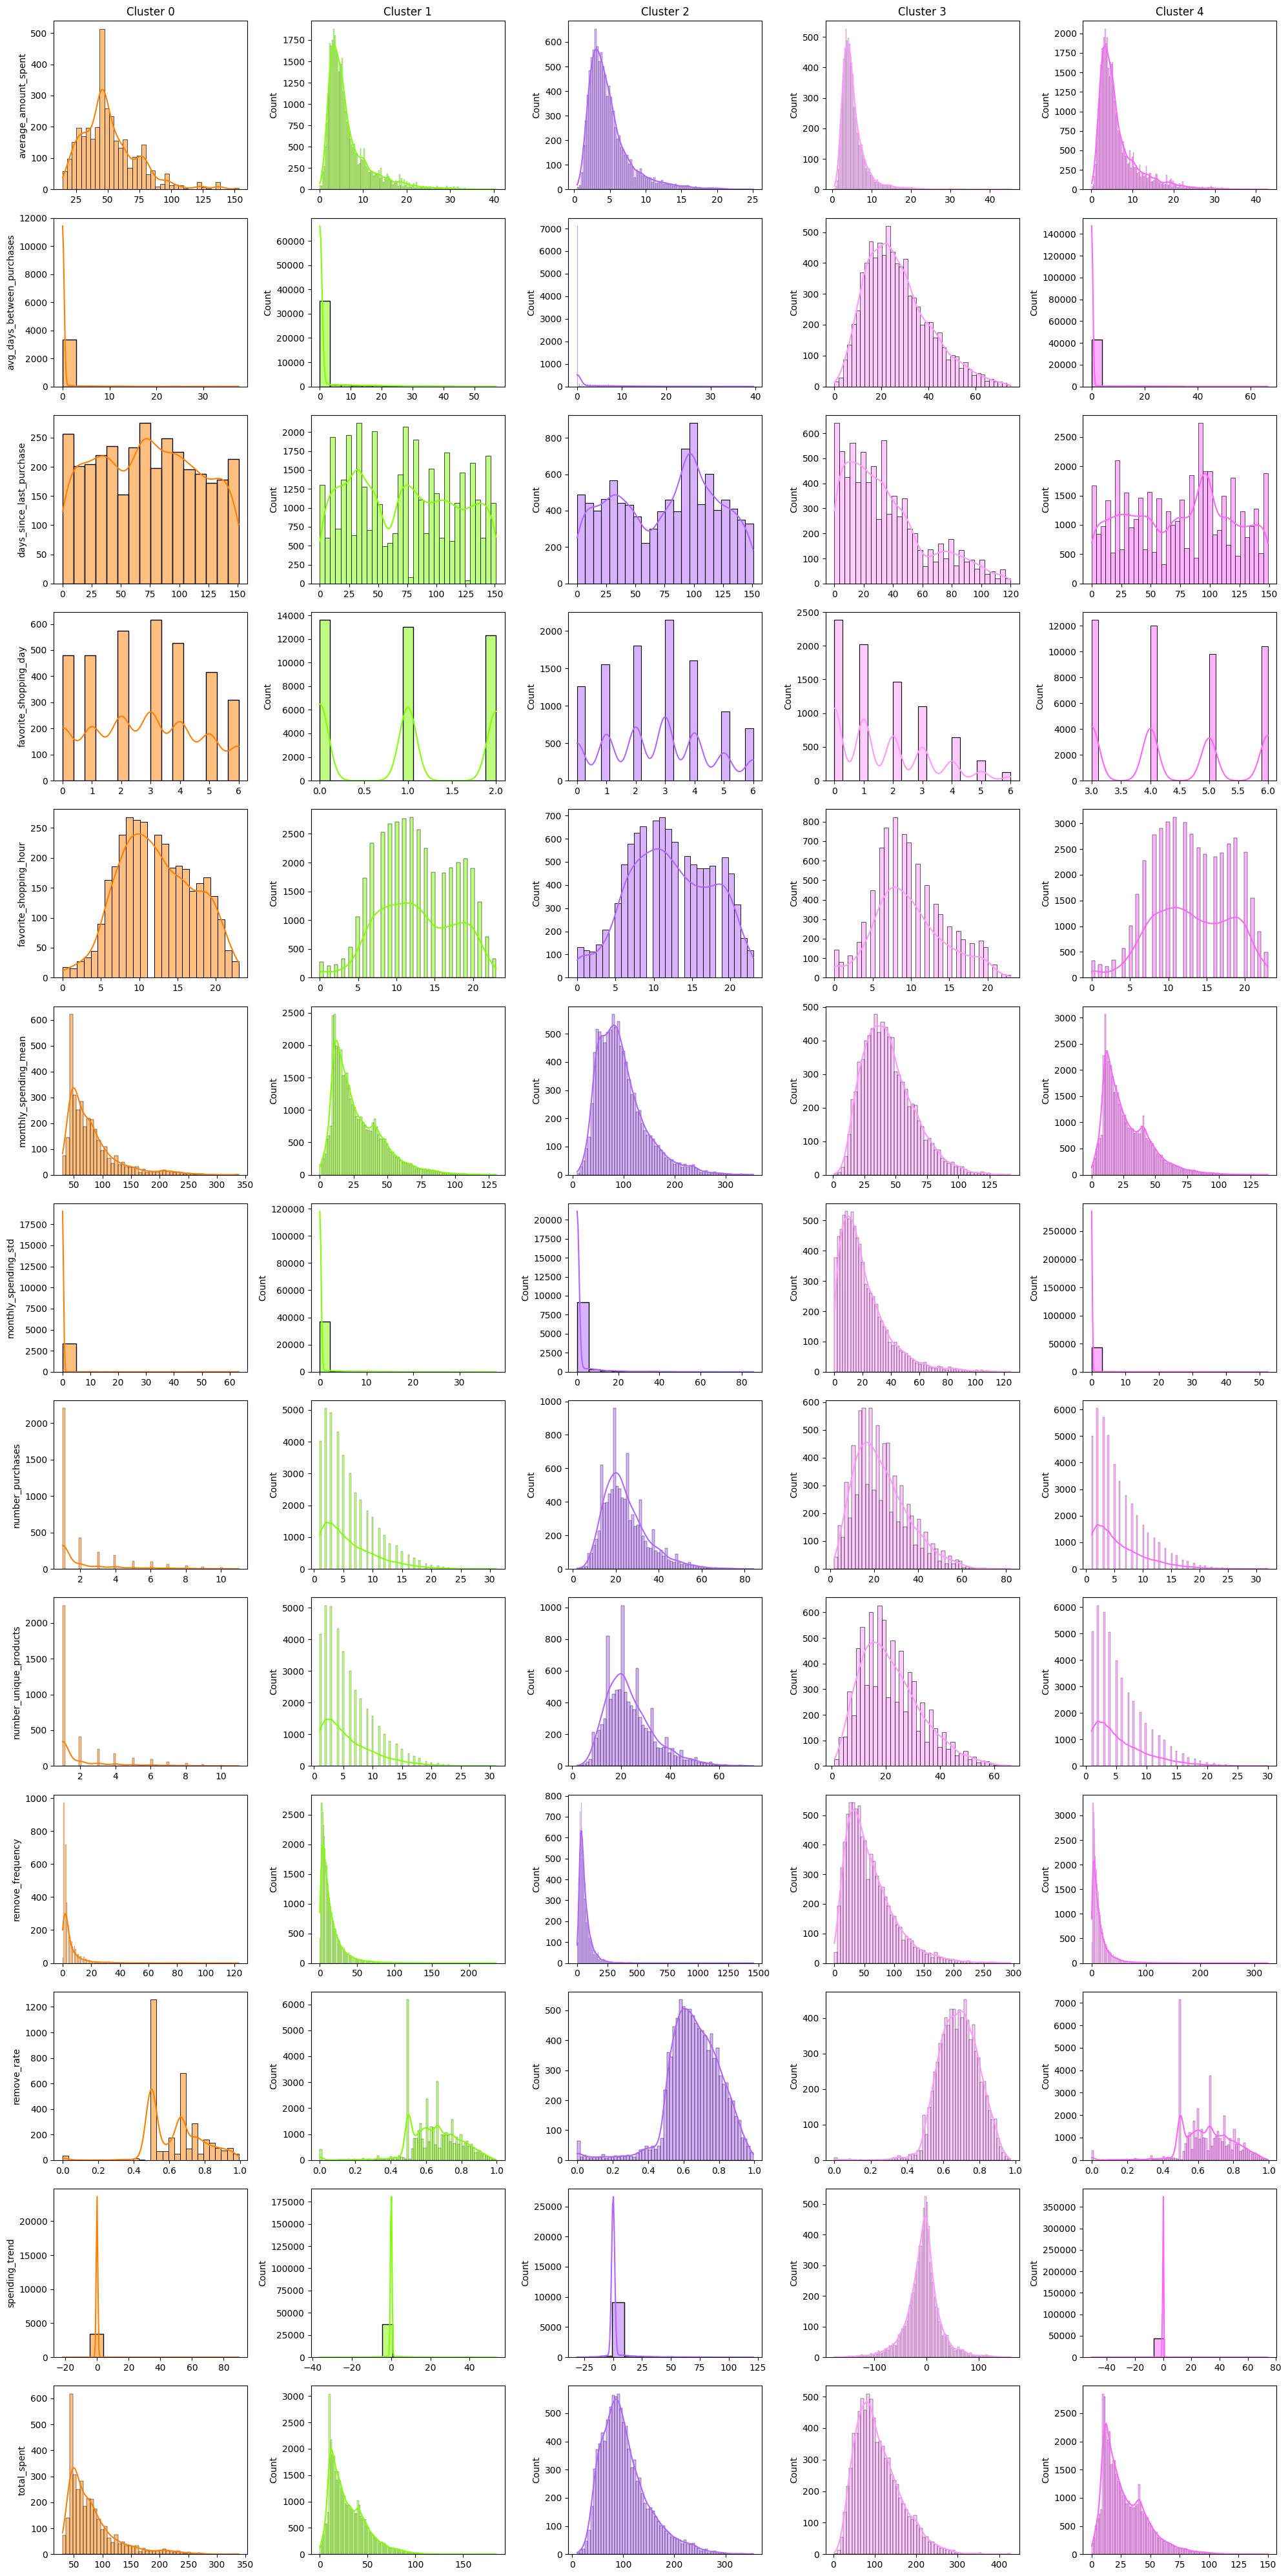

In [5]:
# Get unique cluster labels
clusters = customer_df['cluster'].unique()
num_clusters = len(clusters)
clusters.sort()

features = customer_df.columns.difference(['cluster','user_id','number_events'])

# Create a grid of subplots
fig, axes = plt.subplots(nrows=len(features), ncols=num_clusters, figsize=(20, 40), constrained_layout=True)

# Plot histograms for each feature in each cluster
for row, feature in enumerate(features):
    for col, cluster in enumerate(clusters):
        ax = axes[row, col]
        sns.histplot(customer_df[customer_df['cluster'] == cluster][feature], kde=True, ax=ax, color=palette[col])
        if col == 0:
            ax.set_ylabel(feature)
        if row == 0:
            ax.set_title(f'Cluster {cluster}')
        ax.set_xlabel('')

plt.tight_layout()
plt.show()

Les informations détaillées fournies par les histogrammes permettent une compréhension plus nuancée de chaque groupe, ce qui aide à affiner les profils pour représenter les comportements des clients avec plus de précision. Sur la base de l'analyse détaillée des diagrammes en radar et des histogrammes, voici les profils affinés et les titres de chaque groupe :

**Analyse globale**

- *Cluster 0: "Gros dépensiers occasionnels"*

Les clients du cluster 0 montrent une faible activité d'achat en termes de nombre d'achats et de diversité des produits, mais lorsqu'ils achètent, ils dépensent des sommes importantes. Leur engagement dans les activités de la plateforme est modéré. Ils font des achats relativement fréquemment, avec une préférence pour les jours en début de semaine et en dehors des heures de pointe. Leur comportement d'achat est très décidé, avec de faibles fréquences et taux de retrait des articles du panier. Malgré un faible nombre d'achats, leurs dépenses mensuelles sont relativement élevées et stables, avec une tendance à la hausse. Ce groupe pourrait bénéficier de stratégies visant à augmenter la fréquence de leurs achats tout en maintenant ou augmentant le montant moyen dépensé par achat.

- *Cluster 1: "Acheteurs modérés irréguliers"*

Les clients de ce cluster sont très engagés, participant à de nombreux événements et interagissant fréquemment. Cependant, cet engagement ne se traduit pas par des achats fréquents ou de grande valeur. Ils dépensent peu en général et montrent une préférence pour des produits spécifiques avec une faible diversité dans leurs achats. Bien qu'ils aient tendance à acheter à des moments spécifiques, ils hésitent peu avant de finaliser leurs achats. La tendance des dépenses est légèrement à la hausse, suggérant un potentiel d'augmentation des dépenses futures avec des stratégies de réengagement appropriées.

- *Cluster 2 : "Acheteurs fréquents et diversifiés"*

Les clients de ce cluster sont extrêmement engagés, participant à de nombreux événements et effectuant fréquemment des achats. Ils achètent une grande variété de produits et dépensent globalement plus que la moyenne, bien que le montant moyen par achat soit légèrement inférieur à la moyenne. Leur fréquence d'achat est élevée, et ils montrent une certaine hésitation avant de finaliser leurs achats, comme en témoignent les fréquences et les taux de retrait d'articles élevés. Leurs dépenses mensuelles sont élevées et relativement stables, avec une tendance marquée à la hausse, ce qui suggère un potentiel de croissance continue de leurs dépenses.

- *Cluster 3 : "Acheteurs Engagés mais Hésitants et Décroissants"*

Les clients de ce cluster montrent un engagement élevé en termes de participation à des événements, mais leur activité d'achat récente est très faible, avec des périodes longues entre les achats. Quand ils achètent, ils dépensent de manière significative et achètent une variété de produits, mais leurs habitudes d'achat sont très irrégulières. Leur tendance de dépenses est fortement négative, ce qui indique qu'ils réduisent progressivement leurs dépenses. Ils montrent une préférence pour des horaires atypiques pour faire leurs achats et ont une forte propension à retirer des articles de leurs paniers avant de finaliser les achats. Ces clients pourraient nécessiter des stratégies spécifiques pour réengager et stabiliser leurs comportements d'achat.

- *Cluster 4 : "Acheteurs modérés réguliers"*

Les clients du cluster 4 montrent un bon engagement avec une participation active à de nombreux événements, mais leur nombre d'achats et leurs dépenses totales sont faibles. Ils achètent une petite variété de produits et dépensent peu en moyenne par achat. Malgré cela, ils font des achats plus fréquemment, mais avec des montants faibles, et montrent une préférence pour les achats en fin de semaine et pendant les heures de pointe. Leur comportement d'achat est assez décidé avec une faible fréquence et un taux de retrait des articles. Les dépenses mensuelles sont faibles et stables, avec une légère tendance à la hausse. Ce groupe pourrait bénéficier de stratégies incitatives pour augmenter leur panier moyen et diversifier leurs achats.